# Sample Code for deconvolution
***

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

from deconv.deconv import Deconvolution

In [12]:
file_mix=""
file_ref=""
file_annotation_ref="D:/Gdrive/datasource/ann_file/Rat_transcriptID_RGD.csv"

#df_mix=pd.read_csv(file_mix, index_col=0)
#df_ref=pd.read_csv(file_ref, index_col=0)
df_annotation_ref=pd.read_csv(file_annotation_ref)

In [13]:
df = pd.read_csv("D:/Gdrive/notebook/2004_Transcriptome_Deconvolution/220217_RNAseq_reanalysis/data/gene.txt",index_col=0,delimiter="\t")
df_mix = df.loc[:,(df.columns.str.contains("liver")) | (df.columns.str.contains("wbc")) | (df.columns.str.contains("spleen"))]
df_ref = df.drop(df_mix.columns.tolist(), axis=1)
df_mix.columns = [f"{i.split('_')[0]}_{i.split('_')[1]}" if not 'liver' in i else f"{i.split('_')[0]}{i.split('_')[1]}_{i.split('_')[2]}" for i in df_mix.columns]

In [14]:
dat = Deconvolution()

In [15]:
dat.set_data(df_mix, df_ref)

In [16]:
dat.preprocessing_mix(df_ref=df_annotation_ref, places=[0,1],
                      trimming=True,batch=False,combat=False,
                      trans_method="log2",
                      norm_method_list=["quantile"])

dat.preprocessing_ref(df_ref=df_annotation_ref, places=[0,1],
                      trimming=False,batch=False,combat=False,
                      trans_method="log2",
                      norm_method_list=["raw"])

annotation
trimming
tranformation
1 : quantile
normalization


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\pandas\core\internals\blocks.py:402: RuntimeWarning: divide by zero encountered in log2
  result = func(self.values, **kwargs)


1 : raw


method : multiFC


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


not enough genes picked up


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


not enough genes picked up


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


not enough genes picked up


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


not enough genes picked up
signature genes : 495


C:\ProgramData\miniconda3\envs\deconv\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


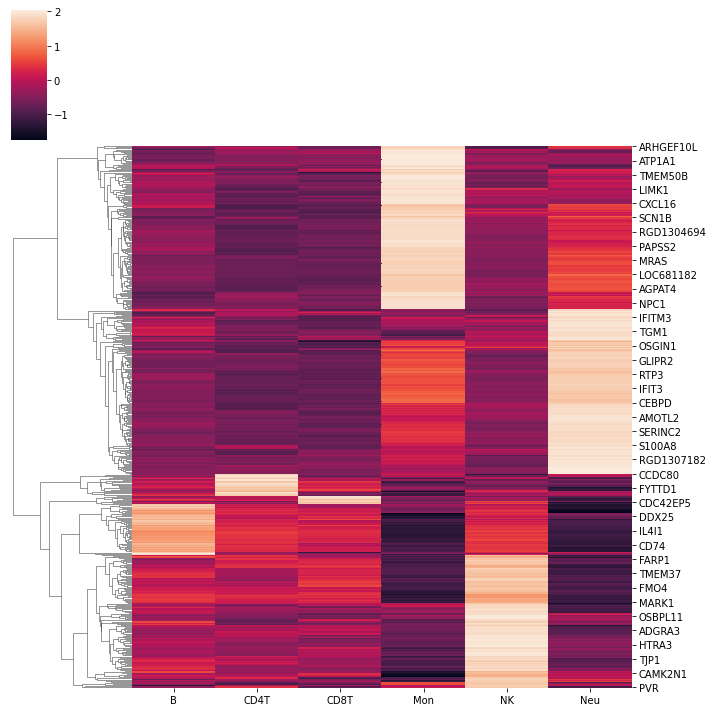

In [17]:
dat.deg(method="multiFC",
        sep="_",number=150,limit_CV=1,limit_FC=1.,log2=False,q_limit=0.05,
        plot=True)

In [18]:
dat.fit(method="elasticnet")

method:  elasticnet
0 rows are removed
0 rows are removed
model score: 0.34694525781522606


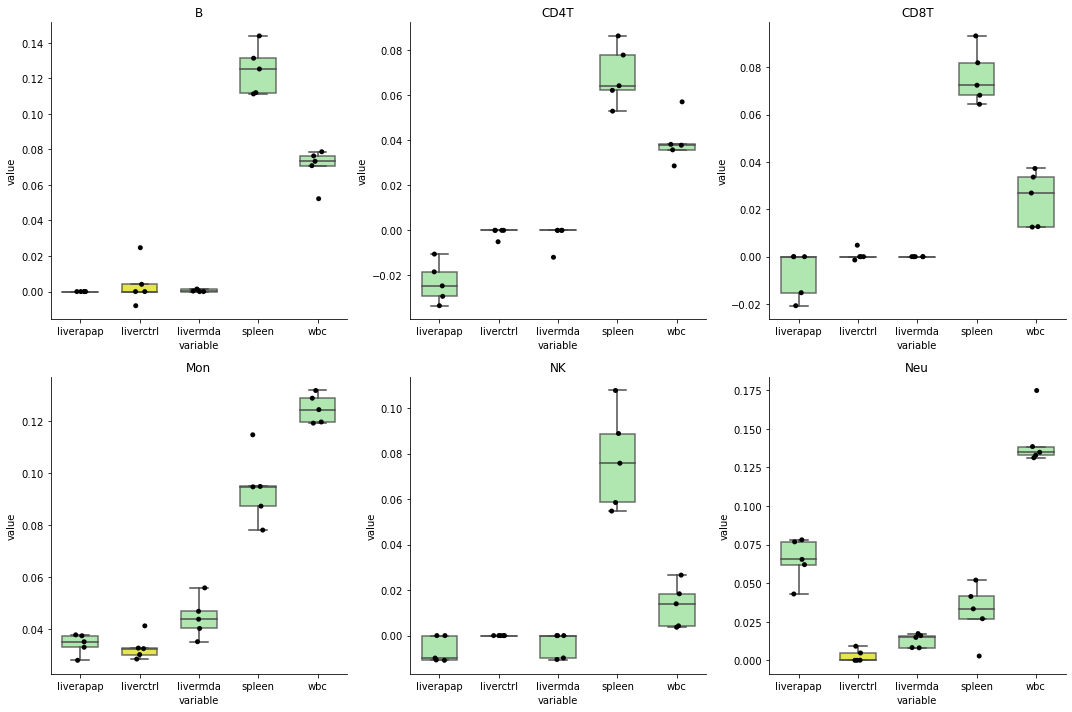

In [19]:
dat.plot_res(control_names=["liverctrl"],sep="_")

In [20]:
dat.get_data()[0] # mix data

,liverapap_1,liverapap_2,liverapap_3,liverapap_4,liverapap_5,liverctrl_1,liverctrl_2,liverctrl_3,liverctrl_4,liverctrl_5,...,spleen_1,spleen_2,spleen_3,spleen_4,spleen_5,wbc_1,wbc_2,wbc_3,wbc_4,wbc_5
A2ML1,4.171892,4.368763,2.679840,3.457114,3.352063,3.051128,3.692861,3.046806,4.147998,4.088962,...,0.687839,2.738042,2.142524,1.767811,1.708707,2.063018,2.317794,3.161509,2.396825,3.121917
A3GALT2,4.777583,5.135787,4.406078,5.164614,4.820383,4.579940,2.922225,4.356737,4.302464,2.955057,...,5.358663,5.301582,4.990571,5.275613,5.340321,4.177978,4.500131,4.859896,4.592598,4.904986
AAAS,6.296436,6.340145,6.170978,6.256932,6.196240,5.989640,5.876509,5.987445,5.916353,5.877821,...,6.104736,6.114602,6.102993,6.115497,6.031997,5.894273,5.799512,5.682490,5.892925,6.002100
AACS,5.084872,5.340559,5.179738,4.780748,4.892280,5.898287,5.492364,5.522481,5.582882,5.536895,...,6.277818,6.294675,6.189399,6.302376,6.280773,6.378833,6.343202,6.436363,6.334977,6.341985
AAGAB,6.100605,6.268855,6.080500,5.974795,6.046206,6.077183,6.050617,6.014483,5.863288,6.029056,...,6.559908,6.500956,6.467008,6.508072,6.494771,6.286339,6.250032,6.259199,6.172023,6.348596
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
ZZZ3,5.059501,5.089095,5.379766,5.129119,5.199992,5.057159,4.907567,4.880658,5.111144,5.095581,...,5.642742,5.567245,5.584156,5.576639,5.610687,5.697179,5.600893,5.650504,5.655223,5.619316
MRPL11,6.661719,6.517437,6.557653,6.536132,6.539822,6.622350,6.611776,6.615163,6.561614,6.573712,...,6.151907,6.081989,6.098274,6.097971,6.114829,5.910433,5.983458,5.966022,6.006913,6.090774
MRPL24,6.635006,6.663041,6.608876,6.641167,6.572851,6.548315,6.461192,6.511042,6.434946,6.351644,...,6.378661,6.346775,6.319169,6.367975,6.378208,6.330969,6.304709,6.234951,6.333053,6.326023
MRPL9,6.403059,6.467155,6.405453,6.418367,6.382982,6.308071,6.250743,6.390397,6.448732,6.398578,...,6.653467,6.607990,6.622350,6.636533,6.653027,6.562646,6.524847,6.505730,6.575887,6.590958


In [21]:
dat.get_data()[1] # ref data

,Mon_5,B_1,B_2,B_3,B_4,B_5,B_6,CD4T_1,CD4T_2,CD4T_3,...,Neu_3,Neu_4,Neu_5,Neu_6,NK_1,NK_2,NK_3,NK_4,NK_5,NK_6
A1BG,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
A1CF,1.917041,0.000000,0.000000,0.000000,0.536623,0.749090,0.289926,0.000000,0.000000,0.305709,...,0.343877,0.350853,0.000000,0.845547,0.000000,0.000000,0.000000,0.555396,0.297339,0.000000
A2M,0.000000,1.487224,1.537942,0.524679,0.707685,0.513098,1.537140,0.164129,0.169150,0.546472,...,0.490985,0.000000,0.000000,0.179374,0.310239,0.185210,1.068251,0.739119,1.087921,0.852808
A2ML1,1.255521,1.786561,0.998844,0.917930,1.223184,1.232711,1.687522,0.790131,1.809739,1.521277,...,0.627395,0.000000,0.000000,0.341491,1.298917,3.419195,2.442018,1.399680,1.243419,1.733623
A3GALT2,5.557582,4.816717,5.585095,4.594804,4.694271,4.310881,4.629785,3.725194,4.499781,4.319475,...,3.704725,3.313323,1.730822,4.792776,4.216264,4.259992,5.425130,5.212667,5.539806,4.441381
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
MRPL11,7.583597,7.871143,7.749989,7.587909,7.658721,7.719543,7.922954,7.915317,7.506486,7.823560,...,6.535465,6.029931,4.979148,6.694329,7.780850,7.610058,8.182406,7.811371,7.895387,7.884946
MRPL24,8.103654,8.467446,8.776172,8.361930,8.051174,8.429524,8.462320,8.778465,8.814563,8.666892,...,7.214256,7.191661,5.891028,7.916443,8.453455,8.442615,8.679606,8.601010,8.509067,8.387032
MRPL9,8.878859,9.119133,9.188242,8.821991,8.643862,8.871707,9.115993,9.238755,8.859089,9.092360,...,8.161771,8.171186,6.592357,8.669987,8.903112,8.920920,9.286540,9.337274,9.143264,9.088537
RNF141,9.396386,7.986987,8.114582,7.830445,7.636022,7.509279,7.848900,7.920426,7.428591,7.925638,...,8.243592,8.548072,6.941688,8.981032,7.932717,7.982940,7.275819,7.951991,8.043913,8.084261


In [22]:
dat.get_data()[2] # reference matrix

,B,CD4T,CD8T,Mon,NK,Neu
CXCL16,6.429517,5.707703,5.660959,9.089840,6.538009,6.256213
ASB2,5.973776,5.640893,5.472562,2.903494,7.842998,3.203929
AKR1B8,3.660451,2.939128,3.243322,6.033732,2.942960,3.891424
DRAM1,6.447972,6.236897,6.531552,10.713593,7.166606,8.818575
BLVRA,9.537515,9.159957,9.254365,12.512871,9.359941,10.883175
...,...,...,...,...,...,...
GLIPR2,6.401435,6.215709,6.130740,9.066566,6.405515,11.088153
PIR,3.360590,3.420987,2.973400,7.154346,3.489076,4.982086
PTAFR,7.016977,6.616612,6.570796,9.449422,7.203569,11.563068
SH2D1B,6.672681,6.189194,5.895639,10.068534,7.842853,7.499113


In [23]:
dat.get_res() # deconvolution result

,B,CD4T,CD8T,Mon,NK,Neu
liverapap_1,-0.000000,-0.010553,-0.000000,0.027877,-0.009868,0.061969
liverapap_2,-0.000000,-0.018446,-0.015229,0.032896,-0.010864,0.076739
liverapap_3,-0.000000,-0.033502,-0.020717,0.037337,-0.010702,0.078048
liverapap_4,-0.000000,-0.029337,-0.000000,0.035011,-0.000000,0.065374
liverapap_5,-0.000000,-0.024680,-0.000000,0.037675,-0.000000,0.042962
liverctrl_1,0.024698,0.000000,0.004844,0.030086,0.000000,0.000000
liverctrl_2,-0.007951,-0.005072,-0.001406,0.032379,-0.000000,0.009133
liverctrl_3,0.000000,-0.000000,0.000000,0.041139,0.000000,0.000000
liverctrl_4,0.000000,0.000000,0.000000,0.028363,0.000000,0.004751
liverctrl_5,0.004096,0.000000,0.000000,0.032587,0.000000,0.000071
